 Задание:
 
Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса 
в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа 
аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

In [2]:
# импортирую необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
df = pd.read_csv("london.csv")

In [120]:
df.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0

In [5]:
# проверяю наличие пропущенных значений 
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [6]:
# проверяю типы данных, отдельно вывожу колонки с  датой и днем недели
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [7]:
df['timestamp'] = pd.to_datetime(df.timestamp)

In [8]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [9]:
df

timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0     2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
1     2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2     2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
3     2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
4     2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...   ...  ...  ...    ...         ...           ...   
17409 2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
17410 2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
17411 2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
17412 2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
17413 2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

       is_holiday  is_weekend  season  
0             0.0         1.0     3.0  
1             0.0         1.0     3.0  
2             0.0         1.0     3.0  
3             0.0         1.0     3.0  
4             0.0         1.0     3.0  
...           ...         ...     ...  
17409         0.0         0.0     3.0  
17410         0.0         0.0     3.0  
17411         0.0         0.0     3.0  
17412         0.0         0.0     3.0  
17413         0.0         0.0     3.0  

[17414 rows x 10 columns]

In [10]:
df = df.assign(date=df.timestamp.dt.date)

In [11]:
df = df.assign(week_day=df.timestamp.dt.strftime('%A'))

In [74]:
df.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season        date week_day  
0         0.0         1.0     3.0  2015-01-04   Sunday  
1         0.0         1.0     3.0  2015-01-04   Sunday  
2         0.0         1.0     3.0  2015-01-04   Sunday  
3         0.0         1.0     3.0  2015-01-04   Sunday  
4         0.0         1.0     3.0  2015-01-04   Sunday

In [13]:
# данные о количестве поездок за конкретный день
df_date = df\
    .groupby('date', as_index=False)\
    .agg({"cnt": 'sum'})\
    .sort_values("date")

In [75]:
df_date.head()

date    cnt
0  2015-01-04   9234
1  2015-01-05  20372
2  2015-01-06  20613
3  2015-01-07  21064
4  2015-01-08  15601

In [15]:
df_date.cnt.sum()

19905972

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]),
 <a list of 9 Text major ticklabel objects>)

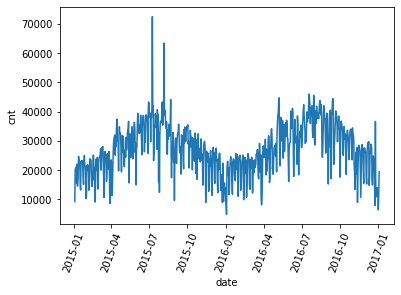

In [16]:
# оцениваю данные с помощью инструментов визуализации 
# видно, что зимой число аренд велосипедов меньше, чем летом
# встречаются как очень резкие скачки числа аренд, так и падения
sns.lineplot(data=df_date, x='date', y='cnt')
plt.xticks(rotation=70)

In [85]:
# видим, что в субботу, воскресенье меньше арендуют
df_date_week = df\
    .groupby('week_day', as_index=False)\
    .agg({"cnt": 'sum'})  

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

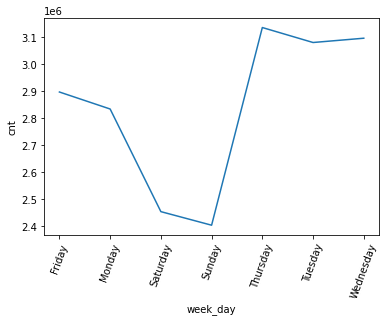

In [86]:
sns.lineplot(data=df_date_week, x='week_day', y='cnt')
plt.xticks(rotation=70)

In [87]:
# преобразуем данные для удобства работы с ними
df_cnt = df.sort_values("timestamp").set_index("timestamp")

In [88]:
df_cnt.head()

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season        date week_day  
timestamp                                                                 
2015-01-04 00:00:00         0.0         1.0     3.0  2015-01-04   Sunday  
2015-01-04 01:00:00         0.0         1.0     3.0  2015-01-04   Sunday  
2015-01-04 02:00:00         0.0         1.0     3.0  2015-01-04   Sunday  
2015-01-04 03:00:00         0.0         1.0     3.0  2015-01-04   Sunday  
2015-01-04 04:00:00         0.0         1.0     3.0  2015-01-04   Sunday

In [95]:
df_cnt = df_cnt.resample(rule='D').cnt.sum()

In [96]:
df_cnt.head()

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
Freq: D, Name: cnt, dtype: int64

In [97]:
df_cnt = df_cnt.to_frame(name="cnt")

In [98]:
type(df_cnt)

pandas.core.frame.DataFrame

In [102]:
# считаю скользящее среднее по числу аренд
df_cnt = df_cnt.assign(cnt_roll=df_cnt.rolling(window=3).mean())

In [103]:
df_cnt.head()

cnt      cnt_roll
timestamp                      
2015-01-04   9234           NaN
2015-01-05  20372           NaN
2015-01-06  20613  16739.666667
2015-01-07  21064  20683.000000
2015-01-08  15601  19092.666667

In [105]:
# считаю разницу между числом аренд и скользящим средним, чтобы выявить аномалии данных
df_cnt = df_cnt.assign(diff=df_cnt.cnt - df_cnt.cnt_roll)

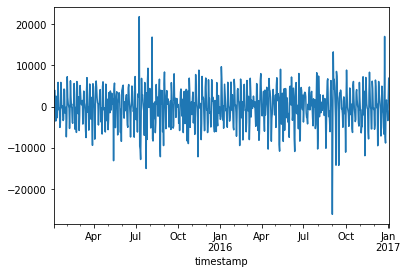

In [106]:
df_cnt['diff'].plot()

In [107]:
std = np.std(df_cnt['diff'])

In [49]:
std

4558.58664111794

In [111]:
# считаю границы доверительного интервала для каждой даты
df_cnt = df_cnt.assign(upper_bound=df_cnt.cnt_roll + 2.576 * std)

In [112]:
df_cnt = df_cnt.assign(lower_bound=df_cnt.cnt_roll - 2.576 * std)

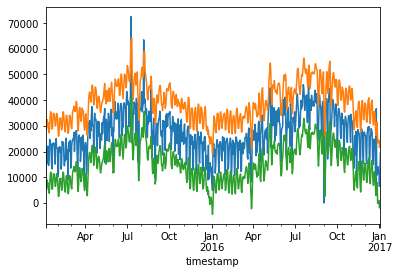

In [113]:
# где синие значения выходят за ружую/зеленую границы - эти случаи надо пристально изучать
df_cnt['cnt'].plot()
df_cnt['upper_bound'].plot()
df_cnt['lower_bound'].plot()

In [114]:
df_cnt.head()

cnt      cnt_roll         diff   upper_bound  lower_bound
timestamp                                                              
2015-01-04   9234           NaN          NaN           NaN          NaN
2015-01-05  20372           NaN          NaN           NaN          NaN
2015-01-06  20613  16739.666667  3873.333333  28482.585854  4996.747479
2015-01-07  21064  20683.000000   381.000000  32425.919188  8940.080812
2015-01-08  15601  19092.666667 -3491.666667  30835.585854  7349.747479

In [54]:
# посмотрим аномально высокие значения
# в поисковиках можно найти информацию о  забастовках работников лондовского метро
df_cnt[df_cnt.cnt > df_cnt.upper_bound]

cnt      cnt_roll          diff   upper_bound   lower_bound
timestamp                                                                
2015-07-09  72504  50705.000000  21799.000000  62447.919188  38962.080812
2015-08-06  63468  46627.333333  16840.666667  58370.252521  34884.414146
2016-09-04  27512  14259.000000  13253.000000  26001.919188   2516.080812
2016-12-25  36653  19650.666667  17002.333333  31393.585854   7907.747479

In [59]:
#  ищу аномалии с низким кол-вом аренд
df_cnt[df_cnt.cnt < df_cnt.lower_bound]

cnt      cnt_roll          diff   upper_bound   lower_bound
timestamp                                                                
2015-05-14  15609  28709.333333 -13100.333333  40452.252521  16966.414146
2015-07-12  23240  36036.666667 -12796.666667  47779.585854  24293.747479
2015-07-24  16034  31013.666667 -14979.666667  42756.585854  19270.747479
2015-08-24  17400  29529.333333 -12129.333333  41272.252521  17786.414146
2015-11-14   8898  21037.333333 -12139.333333  32780.252521   9294.414146
2016-09-02      0  26086.333333 -26086.333333  37829.252521  14343.414146
2016-09-10  17080  31262.000000 -14182.000000  43004.919188  19519.080812
2016-09-16  21967  36193.333333 -14226.333333  47936.252521  24450.414146
2016-11-12   8990  20878.000000 -11888.000000  32620.919188   9135.080812

In [ ]:
# видно ,что данных за 02.09.2016 нет.